# Car Price Prediction Using Linear Regression

This project explores the factors influencing car prices by building a linear regression model to analyze and predict the selling price of used cars. By leveraging the data provided in the `car_data.csv` dataset, we aim to identify key drivers behind car pricing and derive actionable insights that could help sellers and buyers better understand price dynamics in the used car market.

The dataset contains essential car details, including their model, age, fuel type, seller type, and driving history. These features will be analyzed and processed to uncover trends and relationships. Key steps in the project include preparing the data, performing exploratory analysis, and building a regression model to validate hypotheses about price determinants.

The project is divided into three main phases:

- **Data Preparation**: This involves creating dummy variables for categorical features, calculating car age, and scaling numerical variables to ensure consistency in the analysis.
- **Exploratory Analysis**: In this phase, we will examine both categorical and continuous variables, individually and in combination, to uncover patterns and trends in car pricing.
- **Regression Modeling**: Using insights from the exploratory phase, we will define a hypothesis, build a linear regression model, and interpret its results to identify the most influential factors. We will also discuss potential improvements to the model and suggest additional data that could enhance its performance.

By the end of this project, we aim to develop a model that not only predicts car prices with accuracy but also provides meaningful insights into the underlying factors influencing the used car market.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
from statsmodels.formula.api import ols
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
car_data = pd.read_csv('../data/car_data_raw.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Preparation

In [5]:
fuel_type_dummies = pd.get_dummies(car_data['Fuel_Type'])
fuel_type_dummies.head()

,CNG,Diesel,Petrol
0,False,False,True
1,False,True,False
2,False,False,True
3,False,False,True
4,False,True,False


In [6]:
car_data = pd.concat([car_data, fuel_type_dummies], axis = 1)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,False,False,True
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,False,True,False
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,False,False,True
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,False,False,True
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,False,True,False


In [7]:
transmission_dummies = pd.get_dummies(car_data['Transmission'])
transmission_dummies.head()

,Automatic,Manual
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [8]:
car_data = pd.concat([car_data, transmission_dummies], axis = 1)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,False,False,True,False,True
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,False,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,False,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,False,False,True,False,True
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,False,True,False,False,True


In [9]:
seller_type_dummies = pd.get_dummies(car_data['Seller_Type'])
seller_type_dummies.head()

,Dealer,Individual
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [10]:
car_data = pd.concat([car_data, seller_type_dummies], axis = 1)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,False,True,False,False,True,True,False
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,False,True,False,False,True,True,False


In [11]:
car_data['New_vs_Old'] = np.where(car_data['Year'] > 2015, 'new', 'old')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,New_vs_Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False,old
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,False,True,False,False,True,True,False,old
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False,new
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False,old
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,False,True,False,False,True,True,False,old


In [12]:
def scale_columns(df, cols, divisor):
    """Scales specified columns of a DataFrame by a given divisor."""
    for col in cols:
        if col not in df.columns:
            raise KeyError(f"Column '{col}' does not exist in the DataFrame.")
        if not pd.api.types.is_numeric_dtype(df[col]):
            raise TypeError(f"Column '{col}' must contain numeric data.")
    df[cols] = df[cols] / divisor
    return df

# Scale the 'Kms_Driven' column by dividing it by 10,000
col_names = ['Kms_Driven']
car_data = scale_columns(car_data, col_names, 10000)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,New_vs_Old
0,ritz,2014,3.35,5.59,2.700,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False,old
1,sx4,2013,4.75,9.54,4.300,Diesel,Dealer,Manual,0,False,True,False,False,True,True,False,old
2,ciaz,2017,7.25,9.85,0.690,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False,new
3,wagon r,2011,2.85,4.15,0.520,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False,old
4,swift,2014,4.60,6.87,4.245,Diesel,Dealer,Manual,0,False,True,False,False,True,True,False,old


## Exploratory Analysis

In [14]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    float64
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   CNG            301 non-null    bool   
 10  Diesel         301 non-null    bool   
 11  Petrol         301 non-null    bool   
 12  Automatic      301 non-null    bool   
 13  Manual         301 non-null    bool   
 14  Dealer         301 non-null    bool   
 15  Individual     301 non-null    bool   
 16  New_vs_Old     301 non-null    object 
dtypes: bool(7), float64(3), int64(2), object(5)
memory usa

- 301 rows/observations
- 9 columns/variables (+ 8 new columns derived from existing columns)
- 0 missing entries (no need to deal with missing data)
- the `Car_Name`, `Fuel_Type`, `Seller_Type`, `Transmission`, and `New_vs_Old` columns are objects (strings)
- the `Selling_Price` and `Present_Price` columns are floats
- the `Year`, `Kms_Driven`, and `Owner` columns are integers (no need to deal with wrong data type)
- the `CNG`, `Diesel`, and `Petrol` are dummy variables for the `Fuel_Type` variable
- the `Automatic` and `Manual` are dummy variables for the `Transmission` variable
- the `Dealer` and `Individual` are dummy variables for the `Seller_Type` variable

### Univariate analysis for categorical variables

In [17]:
car_data.groupby('Year')['Car_Name'].count()

Year
2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Car_Name, dtype: int64

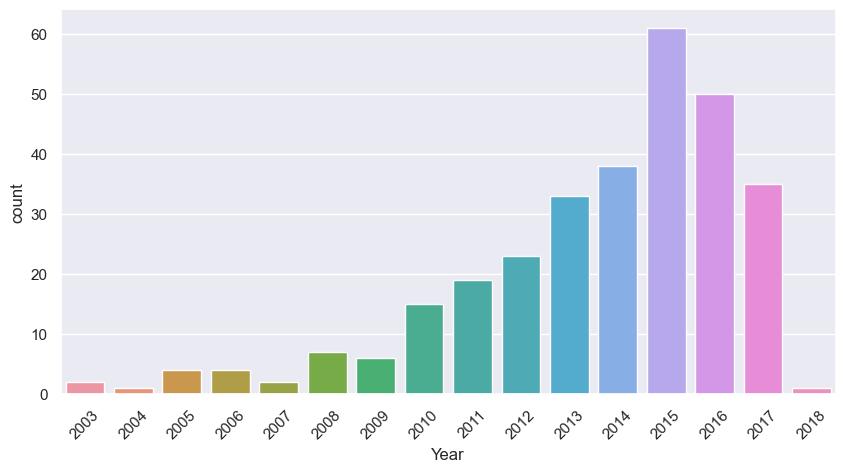

In [18]:
fig = plt.figure(figsize = (10, 5))
sns.countplot(x = 'Year', data = car_data)
plt.xticks(rotation = 45);

In [19]:
# to calculate the percentage of cars from each year relative to the total number of cars in the dataset
car_data.groupby('Year')['Car_Name'].count() / car_data['Car_Name'].count() * 100

Year
2003     0.664452
2004     0.332226
2005     1.328904
2006     1.328904
2007     0.664452
2008     2.325581
2009     1.993355
2010     4.983389
2011     6.312292
2012     7.641196
2013    10.963455
2014    12.624585
2015    20.265781
2016    16.611296
2017    11.627907
2018     0.332226
Name: Car_Name, dtype: float64

The majority of the cars listed in the database were manufactured between 2013 and 2017.

In [21]:
car_data.groupby('Fuel_Type')['Car_Name'].count()

Fuel_Type
CNG         2
Diesel     60
Petrol    239
Name: Car_Name, dtype: int64

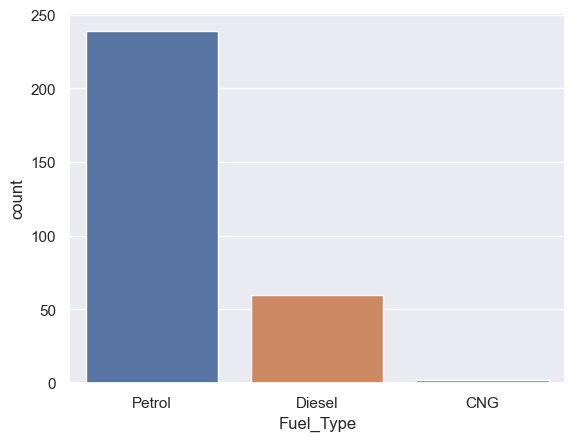

In [22]:
sns.countplot(x = 'Fuel_Type', data = car_data);

In [23]:
car_data.groupby('Fuel_Type')['Car_Name'].count() / car_data['Car_Name'].count() * 100

Fuel_Type
CNG        0.664452
Diesel    19.933555
Petrol    79.401993
Name: Car_Name, dtype: float64

Petrol is the most common fuel type (239 out of 301 (79.4%) cars presented in the database use petrol, 60 (19.9%) - diesel, and 2 (0.7%) - CNG).

In [25]:
car_data.groupby('Seller_Type')['Car_Name'].count()

Seller_Type
Dealer        195
Individual    106
Name: Car_Name, dtype: int64

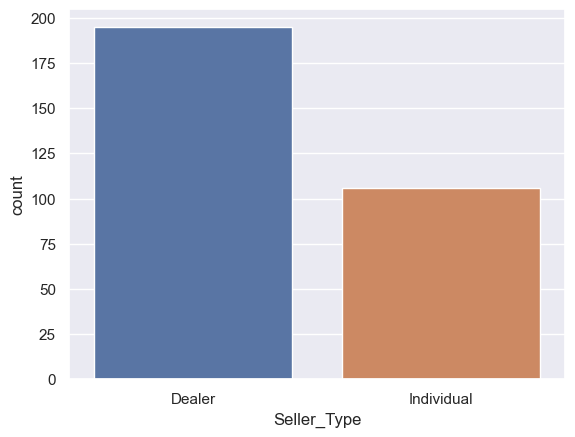

In [26]:
sns.countplot(x = 'Seller_Type', data = car_data);

In [27]:
car_data.groupby('Seller_Type')['Car_Name'].count() / car_data['Car_Name'].count() * 100

Seller_Type
Dealer        64.784053
Individual    35.215947
Name: Car_Name, dtype: float64

For 195 out of 301 (64.8%) cars, the seller is a dealer, and for 106 (35.2%), the seller is an individual.

In [29]:
car_data.groupby('Transmission')['Car_Name'].count()

Transmission
Automatic     40
Manual       261
Name: Car_Name, dtype: int64

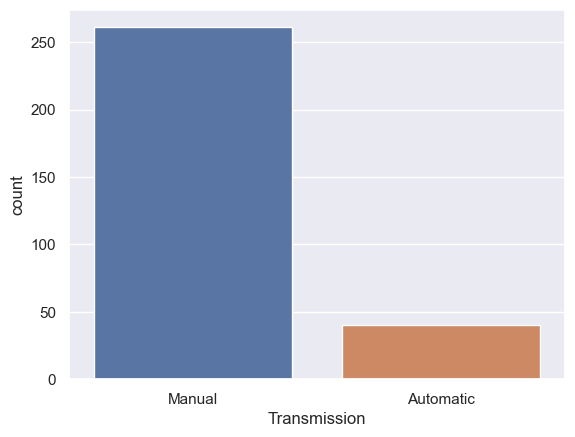

In [30]:
sns.countplot(x = 'Transmission', data = car_data);

In [31]:
car_data.groupby('Transmission')['Car_Name'].count() / car_data['Car_Name'].count() * 100

Transmission
Automatic    13.289037
Manual       86.710963
Name: Car_Name, dtype: float64

261 out of 301 (86.7%) cars are manual, and 40 (13.3%) - automatic.

In [33]:
car_data.groupby('Owner')['Car_Name'].count()

Owner
0    290
1     10
3      1
Name: Car_Name, dtype: int64

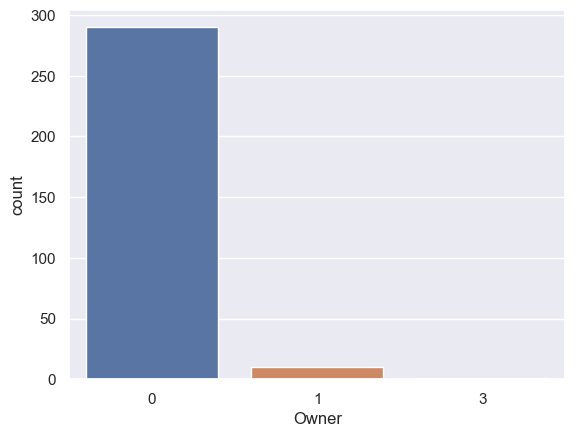

In [34]:
sns.countplot(x = 'Owner', data = car_data);

In [35]:
car_data.groupby('Owner')['Car_Name'].count() / car_data['Car_Name'].count() * 100

Owner
0    96.345515
1     3.322259
3     0.332226
Name: Car_Name, dtype: float64

Most of the cars (290 out of 301 - 96.4%) are owned by the first owner. Second-hand vehicles are much less in number.

In [37]:
car_data.groupby('New_vs_Old')['Car_Name'].count()

New_vs_Old
new     86
old    215
Name: Car_Name, dtype: int64

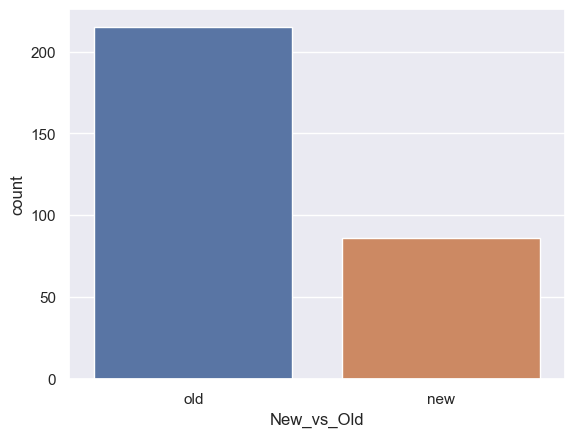

In [38]:
sns.countplot(x = 'New_vs_Old', data = car_data);

In [39]:
car_data.groupby('New_vs_Old')['Car_Name'].count() / car_data['Car_Name'].count() * 100

New_vs_Old
new    28.571429
old    71.428571
Name: Car_Name, dtype: float64

215 out of 301 (71.4%) cars are relatively old (> 5 years), and 86 (28.6%) - are relatively new (<= 5 years).

### Bivariate analysis for categorical - categorical column combinations

In [42]:
car_data.groupby(['New_vs_Old', 'Fuel_Type'])['Car_Name'].count()

New_vs_Old  Fuel_Type
new         Diesel        13
            Petrol        73
old         CNG            2
            Diesel        47
            Petrol       166
Name: Car_Name, dtype: int64

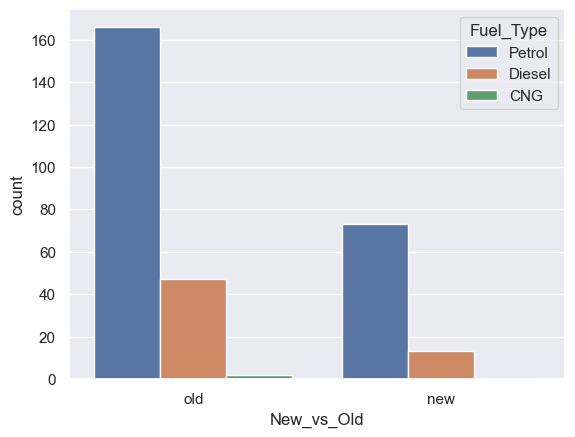

In [43]:
sns.countplot(x = 'New_vs_Old', hue = 'Fuel_Type', data = car_data);

In [44]:
car_data.groupby(['New_vs_Old', 'Fuel_Type'])['Car_Name'].count() / car_data.groupby('New_vs_Old')['Car_Name'].count() * 100

New_vs_Old  Fuel_Type
new         Diesel       15.116279
            Petrol       84.883721
old         CNG           0.930233
            Diesel       21.860465
            Petrol       77.209302
Name: Car_Name, dtype: float64

Most of the new cars (73 out of 86 - 84.9%) use petrol as a fuel, and 13 (15.1%) - diesel; most of the old cars (166 out of 215 - 77.2%) use petrol, 47 (21.9%) - diesel, and 2 (0.9%) - CNG. The new cars have more petrol cars than the old ones.

In [46]:
car_data.groupby(['New_vs_Old', 'Seller_Type'])['Car_Name'].count()

New_vs_Old  Seller_Type
new         Dealer          50
            Individual      36
old         Dealer         145
            Individual      70
Name: Car_Name, dtype: int64

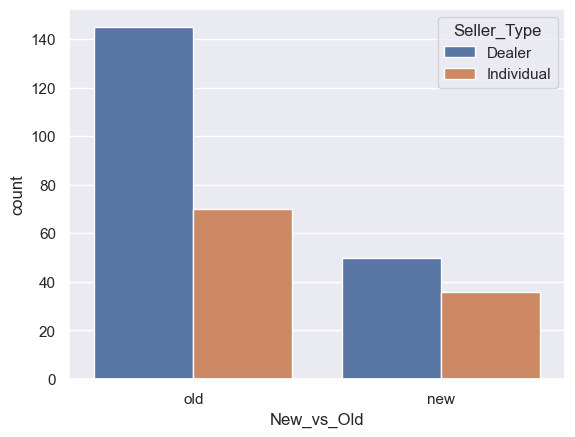

In [47]:
sns.countplot(x = 'New_vs_Old', hue = 'Seller_Type', data = car_data);

In [48]:
car_data.groupby(['New_vs_Old', 'Seller_Type'])['Car_Name'].count() / car_data.groupby('New_vs_Old')['Car_Name'].count() * 100

New_vs_Old  Seller_Type
new         Dealer         58.139535
            Individual     41.860465
old         Dealer         67.441860
            Individual     32.558140
Name: Car_Name, dtype: float64

For most of the new cars (50 out of 86 - 58.1%), the seller is a dealer, and for 36 (41.9%) - the seller is an individual; for most of the old cars (145 out of 215 - 67.4%), the seller is a dealer and, for 70 (32.6%) - the seller is an individual. For the new cars, the seller has a more significant percentage than the old cars.

In [50]:
car_data.groupby(['New_vs_Old', 'Transmission'])['Car_Name'].count()

New_vs_Old  Transmission
new         Automatic        14
            Manual           72
old         Automatic        26
            Manual          189
Name: Car_Name, dtype: int64

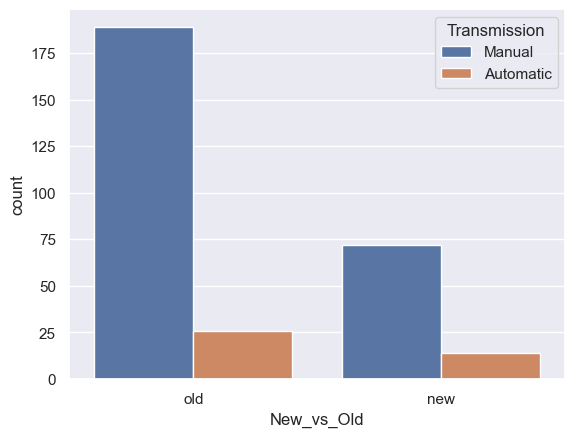

In [51]:
sns.countplot(x = 'New_vs_Old', hue = 'Transmission', data = car_data);

In [52]:
car_data.groupby(['New_vs_Old', 'Transmission'])['Car_Name'].count() / car_data.groupby('New_vs_Old')['Car_Name'].count() * 100

New_vs_Old  Transmission
new         Automatic       16.279070
            Manual          83.720930
old         Automatic       12.093023
            Manual          87.906977
Name: Car_Name, dtype: float64

Most of the new cars (72 out of 86 - 83.7%) are manual and 14 (16.3%) - automatic; most of the old cars (189 out of 215 - 87.9%) are manual and 26 (12.1%) - automatic. The new vehicles have more automatic cars than the old ones.

In [54]:
car_data.groupby(['New_vs_Old', 'Owner'])['Car_Name'].count()

New_vs_Old  Owner
new         0         85
            1          1
old         0        205
            1          9
            3          1
Name: Car_Name, dtype: int64

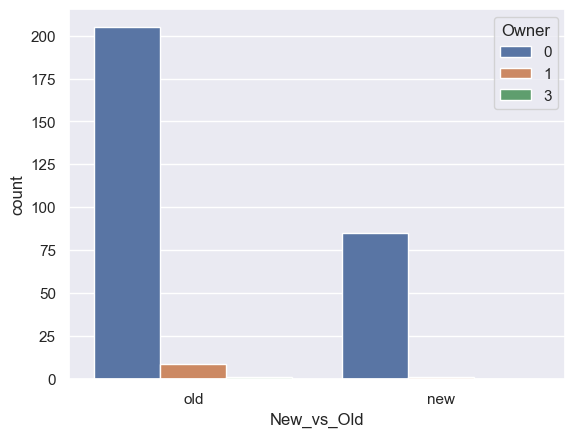

In [55]:
sns.countplot(x = 'New_vs_Old', hue = 'Owner', data = car_data);

In [56]:
car_data.groupby(['New_vs_Old', 'Owner'])['Car_Name'].count() / car_data.groupby('New_vs_Old')['Car_Name'].count() * 100

New_vs_Old  Owner
new         0        98.837209
            1         1.162791
old         0        95.348837
            1         4.186047
            3         0.465116
Name: Car_Name, dtype: float64

Most new and old cars (> 95%) are owned by the first owner.

In [58]:
car_data.groupby(['New_vs_Old', 'Seller_Type', 'Fuel_Type', 'Transmission', 'Owner'])['Car_Name'].count().unstack()

Owner                                             0    1    3
New_vs_Old Seller_Type Fuel_Type Transmission                
new        Dealer      Diesel    Automatic      4.0  NaN  NaN
                                 Manual         9.0  NaN  NaN
                       Petrol    Automatic      5.0  NaN  NaN
                                 Manual        31.0  1.0  NaN
           Individual  Petrol    Automatic      5.0  NaN  NaN
                                 Manual        31.0  NaN  NaN
old        Dealer      CNG       Manual         2.0  NaN  NaN
                       Diesel    Automatic      7.0  NaN  NaN
                                 Manual        38.0  1.0  NaN
                       Petrol    Automatic     13.0  NaN  NaN
                                 Manual        82.0  2.0  NaN
           Individual  Diesel    Automatic      1.0  NaN  NaN
                       Petrol    Automatic      4.0  NaN  1.0
                                 Manual        58.0  6.0  NaN

In general, most new cars presented in the database are manual petrol cars owned by the first owner (the seller is a dealer or an individual); most old cars are manual petrol cars owned by the first owner (the seller is a dealer).

In [60]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,3.694721,0.043189
std,2.891554,5.082812,8.644115,3.888688,0.247915
min,2003.000000,0.100000,0.320000,0.050000,0.000000
25%,2012.000000,0.900000,1.200000,1.500000,0.000000
50%,2014.000000,3.600000,6.400000,3.200000,0.000000
75%,2016.000000,6.000000,9.900000,4.876700,0.000000
max,2018.000000,35.000000,92.600000,50.000000,3.000000


### Univariate analysis for continuous variables

In [62]:
car_data['Selling_Price'].agg(['min', 'max', 'median', 'mean'])

min        0.100000
max       35.000000
median     3.600000
mean       4.661296
Name: Selling_Price, dtype: float64

In [63]:
car_data['Selling_Price'].max() - car_data['Selling_Price'].min()

34.9

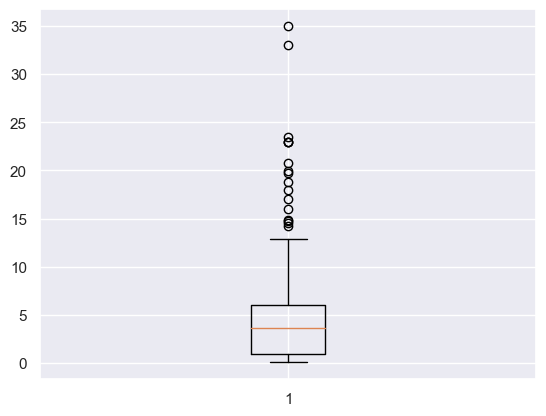

In [64]:
plt.boxplot(car_data['Selling_Price']);

The boxplot visualizes the distribution of the `Selling_Price` variable in the dataset. The box represents the interquartile range (IQR), where the lower and upper edges correspond to the 25th and 75th percentiles. The orange line inside the box indicates the median selling price. The whiskers extend to the data points within 1.5 times the IQR, while the individual points above the whiskers represent outliers—cars with unusually high selling prices. The plot suggests that most selling prices are concentrated within a lower range, with many outliers above 15, indicating some high-value cars in the dataset. This highlights the need to account for these outliers during further analysis, as they may skew results.

In [66]:
car_data[car_data['Selling_Price'] > 12.50]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,New_vs_Old
50,fortuner,2012,14.90,30.61,10.4707,Diesel,Dealer,Automatic,0,False,True,False,True,False,True,False,old
51,fortuner,2015,23.00,30.61,4.0000,Diesel,Dealer,Automatic,0,False,True,False,True,False,True,False,old
52,innova,2017,18.00,19.77,1.5000,Diesel,Dealer,Automatic,0,False,True,False,True,False,True,False,new
53,fortuner,2013,16.00,30.61,13.5000,Diesel,Individual,Automatic,0,False,True,False,True,False,False,True,old
59,fortuner,2014,19.99,35.96,4.1000,Diesel,Dealer,Automatic,0,False,True,False,True,False,True,False,old
62,fortuner,2014,18.75,35.96,7.8000,Diesel,Dealer,Automatic,0,False,True,False,True,False,True,False,old
63,fortuner,2015,23.50,35.96,4.7000,Diesel,Dealer,Automatic,0,False,True,False,True,False,True,False,old
64,fortuner,2017,33.00,36.23,0.6000,Diesel,Dealer,Automatic,0,False,True,False,True,False,True,False,new
66,innova,2017,19.75,23.15,1.1000,Petrol,Dealer,Automatic,0,False,False,True,True,False,True,False,new
69,corolla altis,2016,14.25,20.91,1.2000,Petrol,Dealer,Manual,0,False,False,True,False,True,True,False,new


In [67]:
car_data_sp_adjust = car_data.drop([50, 51, 52, 53, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 93, 96, 97, 250], axis = 0)

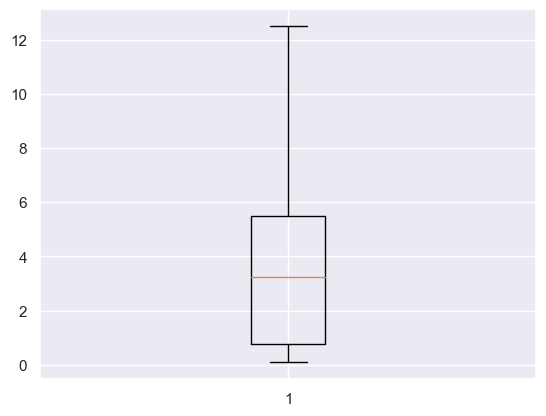

In [68]:
plt.boxplot(car_data_sp_adjust['Selling_Price']);

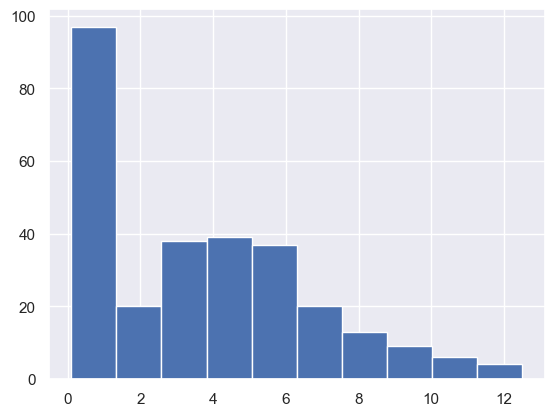

In [69]:
plt.hist(car_data_sp_adjust['Selling_Price']);

The histogram of the data above is not symmetrical; it displays a right-skewed distribution.

In [71]:
car_data_sp_adjust['Present_Price'].agg(['min', 'max', 'median', 'mean'])

min        0.320000
max       23.730000
median     5.870000
mean       6.164912
Name: Present_Price, dtype: float64

In [72]:
car_data_sp_adjust['Present_Price'].max() - car_data_sp_adjust['Present_Price'].min()

23.41

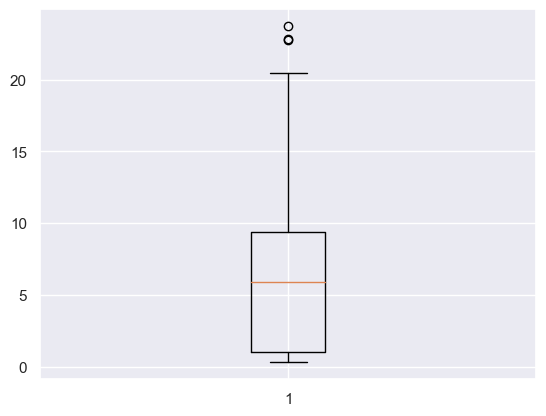

In [73]:
plt.boxplot(car_data_sp_adjust['Present_Price']);

The boxplot illustrates the distribution of the `Present_Price` variable in the dataset. The interquartile range (IQR), represented by the box, shows that most present prices fall between approximately 5 and 10. The orange line inside the box indicates the median present price, which is slightly above 5. The whiskers extend to the data points within 1.5 times the IQR, while a few outliers, represented by individual points, lie above 20, indicating cars with significantly higher present prices. The overall distribution suggests a concentration of prices in the lower range, with a small number of higher-priced vehicles skewing the data.

In [75]:
car_data_sp_adjust[car_data_sp_adjust['Present_Price'] > 22]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,New_vs_Old
78,corolla altis,2010,5.25,22.83,8.0,Petrol,Dealer,Automatic,0,False,False,True,True,False,True,False,old
85,camry,2006,2.50,23.73,14.2,Petrol,Individual,Automatic,3,False,False,True,True,False,False,True,old
94,corolla altis,2008,4.00,22.78,8.9,Petrol,Dealer,Automatic,0,False,False,True,True,False,True,False,old


In [76]:
car_data_sp_pp_adjust = car_data_sp_adjust.drop([78, 85, 94], axis = 0)

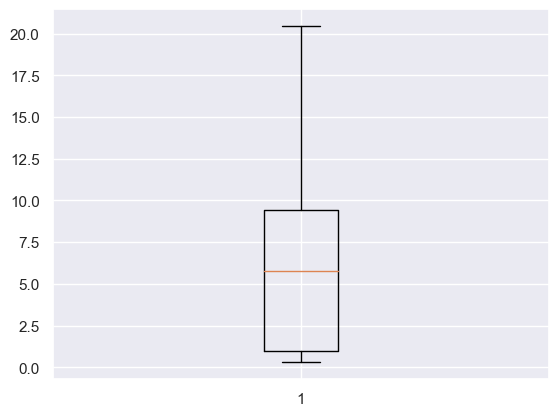

In [77]:
plt.boxplot(car_data_sp_pp_adjust['Present_Price']);

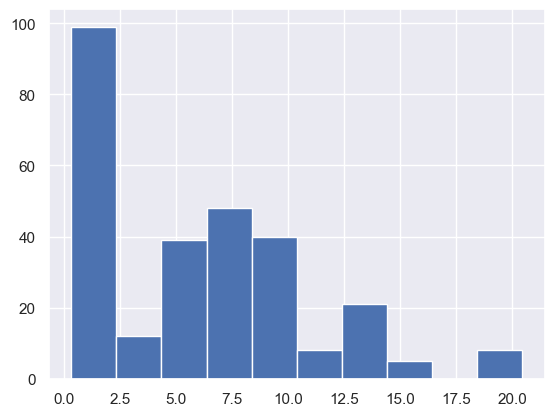

In [78]:
plt.hist(car_data_sp_pp_adjust['Present_Price']);

The histogram of the data above is not symmetrical; it displays a right-skewed distribution.

In [80]:
car_data_sp_pp_adjust['Kms_Driven'].agg(['min', 'max', 'median', 'mean'])

min        0.05000
max       50.00000
median     3.15155
mean       3.57206
Name: Kms_Driven, dtype: float64

In [81]:
car_data_sp_pp_adjust['Kms_Driven'].max() - car_data_sp_pp_adjust['Kms_Driven'].min()

49.95

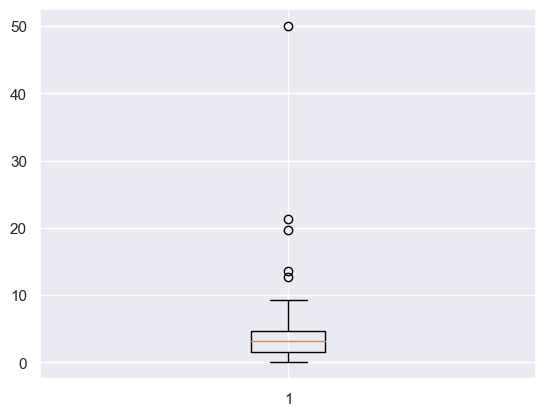

In [82]:
plt.boxplot(car_data_sp_pp_adjust['Kms_Driven']);

The boxplot visualizes the distribution of the Kms_Driven variable, representing the distance cars have travelled. The interquartile range (IQR), shown by the box, indicates that most cars have driven between approximately 0 and 10 units (in thousands, assuming scaling). The median value, depicted by the orange line within the box, is slightly below 5. The whiskers extend to values within 1.5 times the IQR, while several points above 20 represent outliers—cars that have been driven significantly more. One extreme outlier exceeds 50, indicating a vehicle with exceptionally high mileage. This distribution highlights that most cars in the dataset have moderate mileage, but a few high-mileage outliers could influence analysis or modelling.

In [84]:
car_data_sp_pp_adjust[car_data_sp_pp_adjust['Kms_Driven'] > 9]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,New_vs_Old
37,800,2003,0.35,2.28,12.7000,Petrol,Individual,Manual,0,False,False,True,False,True,False,True,old
77,corolla,2004,1.50,12.35,13.5154,Petrol,Dealer,Automatic,0,False,False,True,True,False,True,False,old
84,innova,2005,3.49,13.46,19.7176,Diesel,Dealer,Manual,0,False,True,False,False,True,True,False,old
179,Honda Karizma,2010,0.31,1.05,21.3000,Petrol,Individual,Manual,0,False,False,True,False,True,False,True,old
196,Activa 3g,2008,0.17,0.52,50.0000,Petrol,Individual,Automatic,0,False,False,True,True,False,False,True,old
200,Bajaj Pulsar 150,2006,0.10,0.75,9.2233,Petrol,Individual,Manual,0,False,False,True,False,True,False,True,old


In [85]:
car_data_sp_pp_km_adjust = car_data_sp_pp_adjust.drop([37, 77, 84, 179, 196, 200], axis = 0)

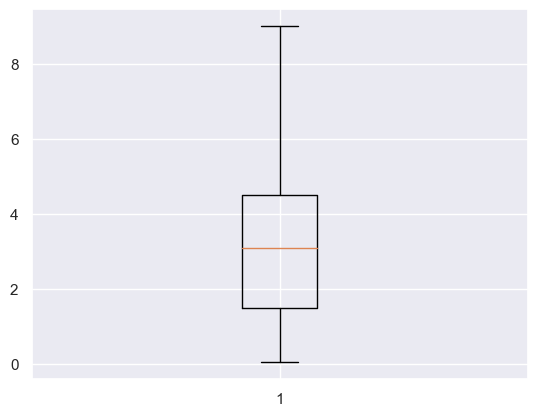

In [86]:
plt.boxplot(car_data_sp_pp_km_adjust['Kms_Driven']);

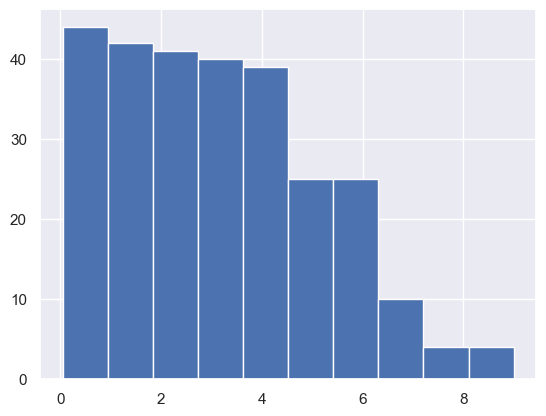

In [87]:
plt.hist(car_data_sp_pp_km_adjust['Kms_Driven']);

The histogram of the data above is not symmetrical; it displays a right-skewed distribution.

### Bivariate analysis for numeric - categorical column combinations

In [90]:
car_data_sp_pp_km_adjust.groupby('Fuel_Type')['Selling_Price'].agg(['min', 'max', 'median', 'mean'])

,min,max,median,mean
Fuel_Type,,,,
CNG,2.95,3.25,3.100,3.100000
Diesel,3.10,12.50,6.325,6.868182
Petrol,0.12,11.45,2.675,3.135789


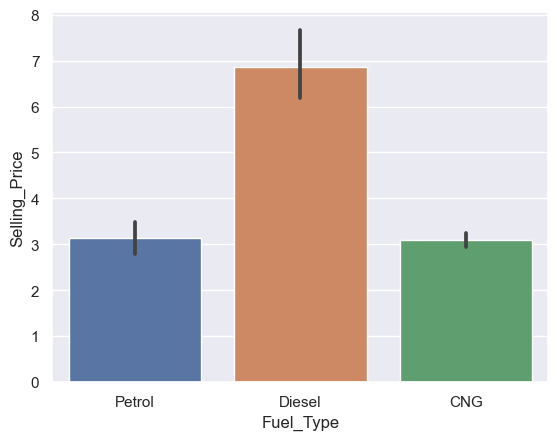

In [91]:
sns.barplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_data_sp_pp_km_adjust);

Used cars with diesel as a fuel type have higher selling prices than used cars with petrol or CNG as fuel types.

In [93]:
car_data_sp_pp_km_adjust.groupby('Seller_Type')['Selling_Price'].agg(['min', 'max', 'median', 'mean'])

,min,max,median,mean
Seller_Type,,,,
Dealer,1.05,12.5,5.055,5.462471
Individual,0.12,6.0,0.535,0.728900


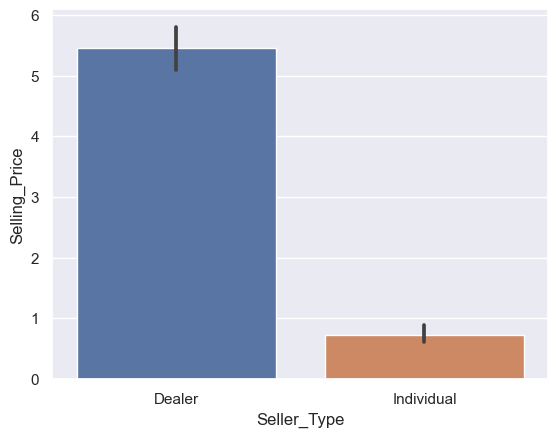

In [94]:
sns.barplot(x = 'Seller_Type', y = 'Selling_Price', data = car_data_sp_pp_km_adjust);

Used cars have a higher selling price when sold by dealers than by individuals.

In [96]:
car_data_sp_pp_km_adjust.groupby('Transmission')['Selling_Price'].agg(['min', 'max', 'median', 'mean'])

,min,max,median,mean
Transmission,,,,
Automatic,0.25,11.45,4.805,4.329091
Manual,0.12,12.50,3.200,3.683016


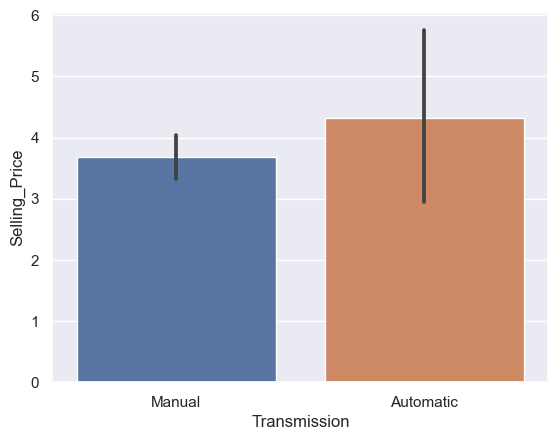

In [97]:
sns.barplot(x = 'Transmission', y = 'Selling_Price', data = car_data_sp_pp_km_adjust);

The selling price of used cars with manual transmissions is lower than those with automatic transmissions.

In [99]:
car_data_sp_pp_km_adjust.groupby('Owner')['Selling_Price'].agg(['min', 'max', 'median', 'mean'])

,min,max,median,mean
Owner,,,,
0,0.12,12.50,3.4,3.801742
1,0.15,5.25,0.8,1.970000


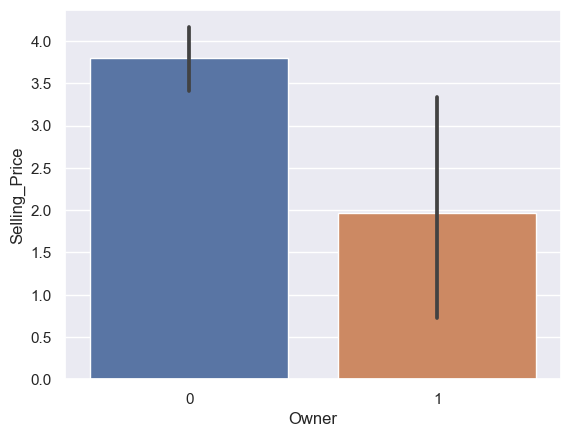

In [100]:
sns.barplot(x = 'Owner', y = 'Selling_Price', data = car_data_sp_pp_km_adjust);

The selling price of used cars with no previous owners is higher than the rest.

In [102]:
car_data_sp_pp_km_adjust.groupby('New_vs_Old')['Selling_Price'].agg(['min', 'max', 'median', 'mean'])

,min,max,median,mean
New_vs_Old,,,,
new,0.30,11.5,3.00,4.075974
old,0.12,12.5,3.45,3.601574


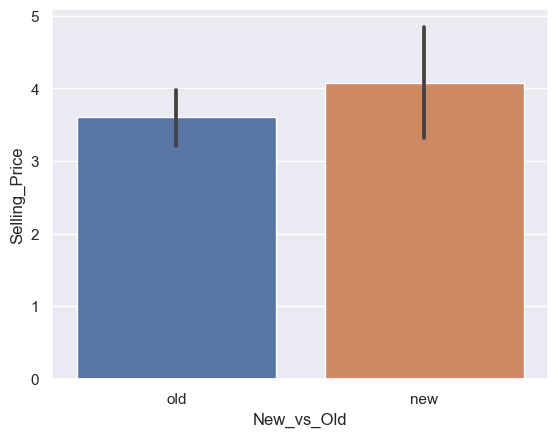

In [103]:
sns.barplot(x = 'New_vs_Old', y = 'Selling_Price', data = car_data_sp_pp_km_adjust);

Used cars up to 5 years old have higher selling prices than older ones.

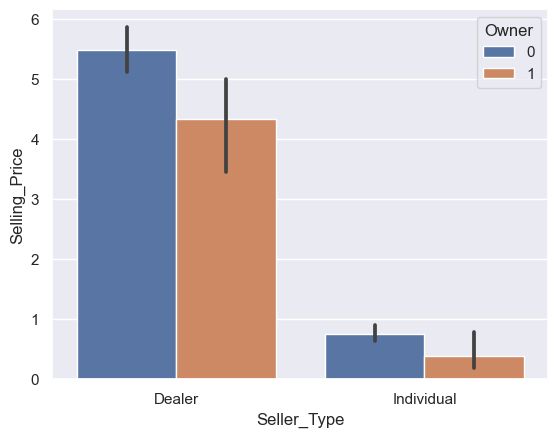

In [105]:
sns.barplot(x = 'Seller_Type', y = 'Selling_Price', hue = 'Owner', data = car_data_sp_pp_km_adjust);

Used cars with previous owners have a higher selling price when sold by dealers than used cars with no previous owners sold by individuals.

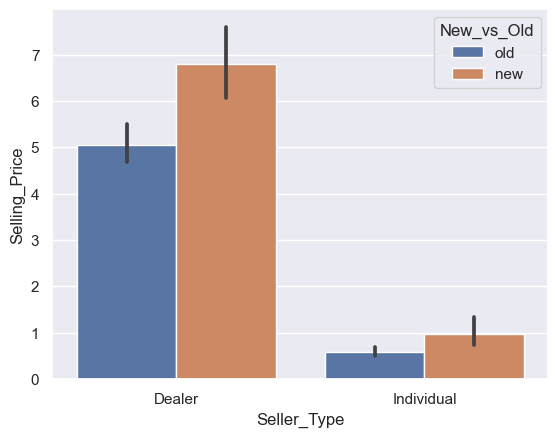

In [107]:
sns.barplot(x = 'Seller_Type', y = 'Selling_Price', hue = 'New_vs_Old', data = car_data_sp_pp_km_adjust);

Relatively old used cars have a higher selling price when sold by dealers than relatively new used cars sold by individuals.

### Bivariate analysis for numeric - numeric column combinations

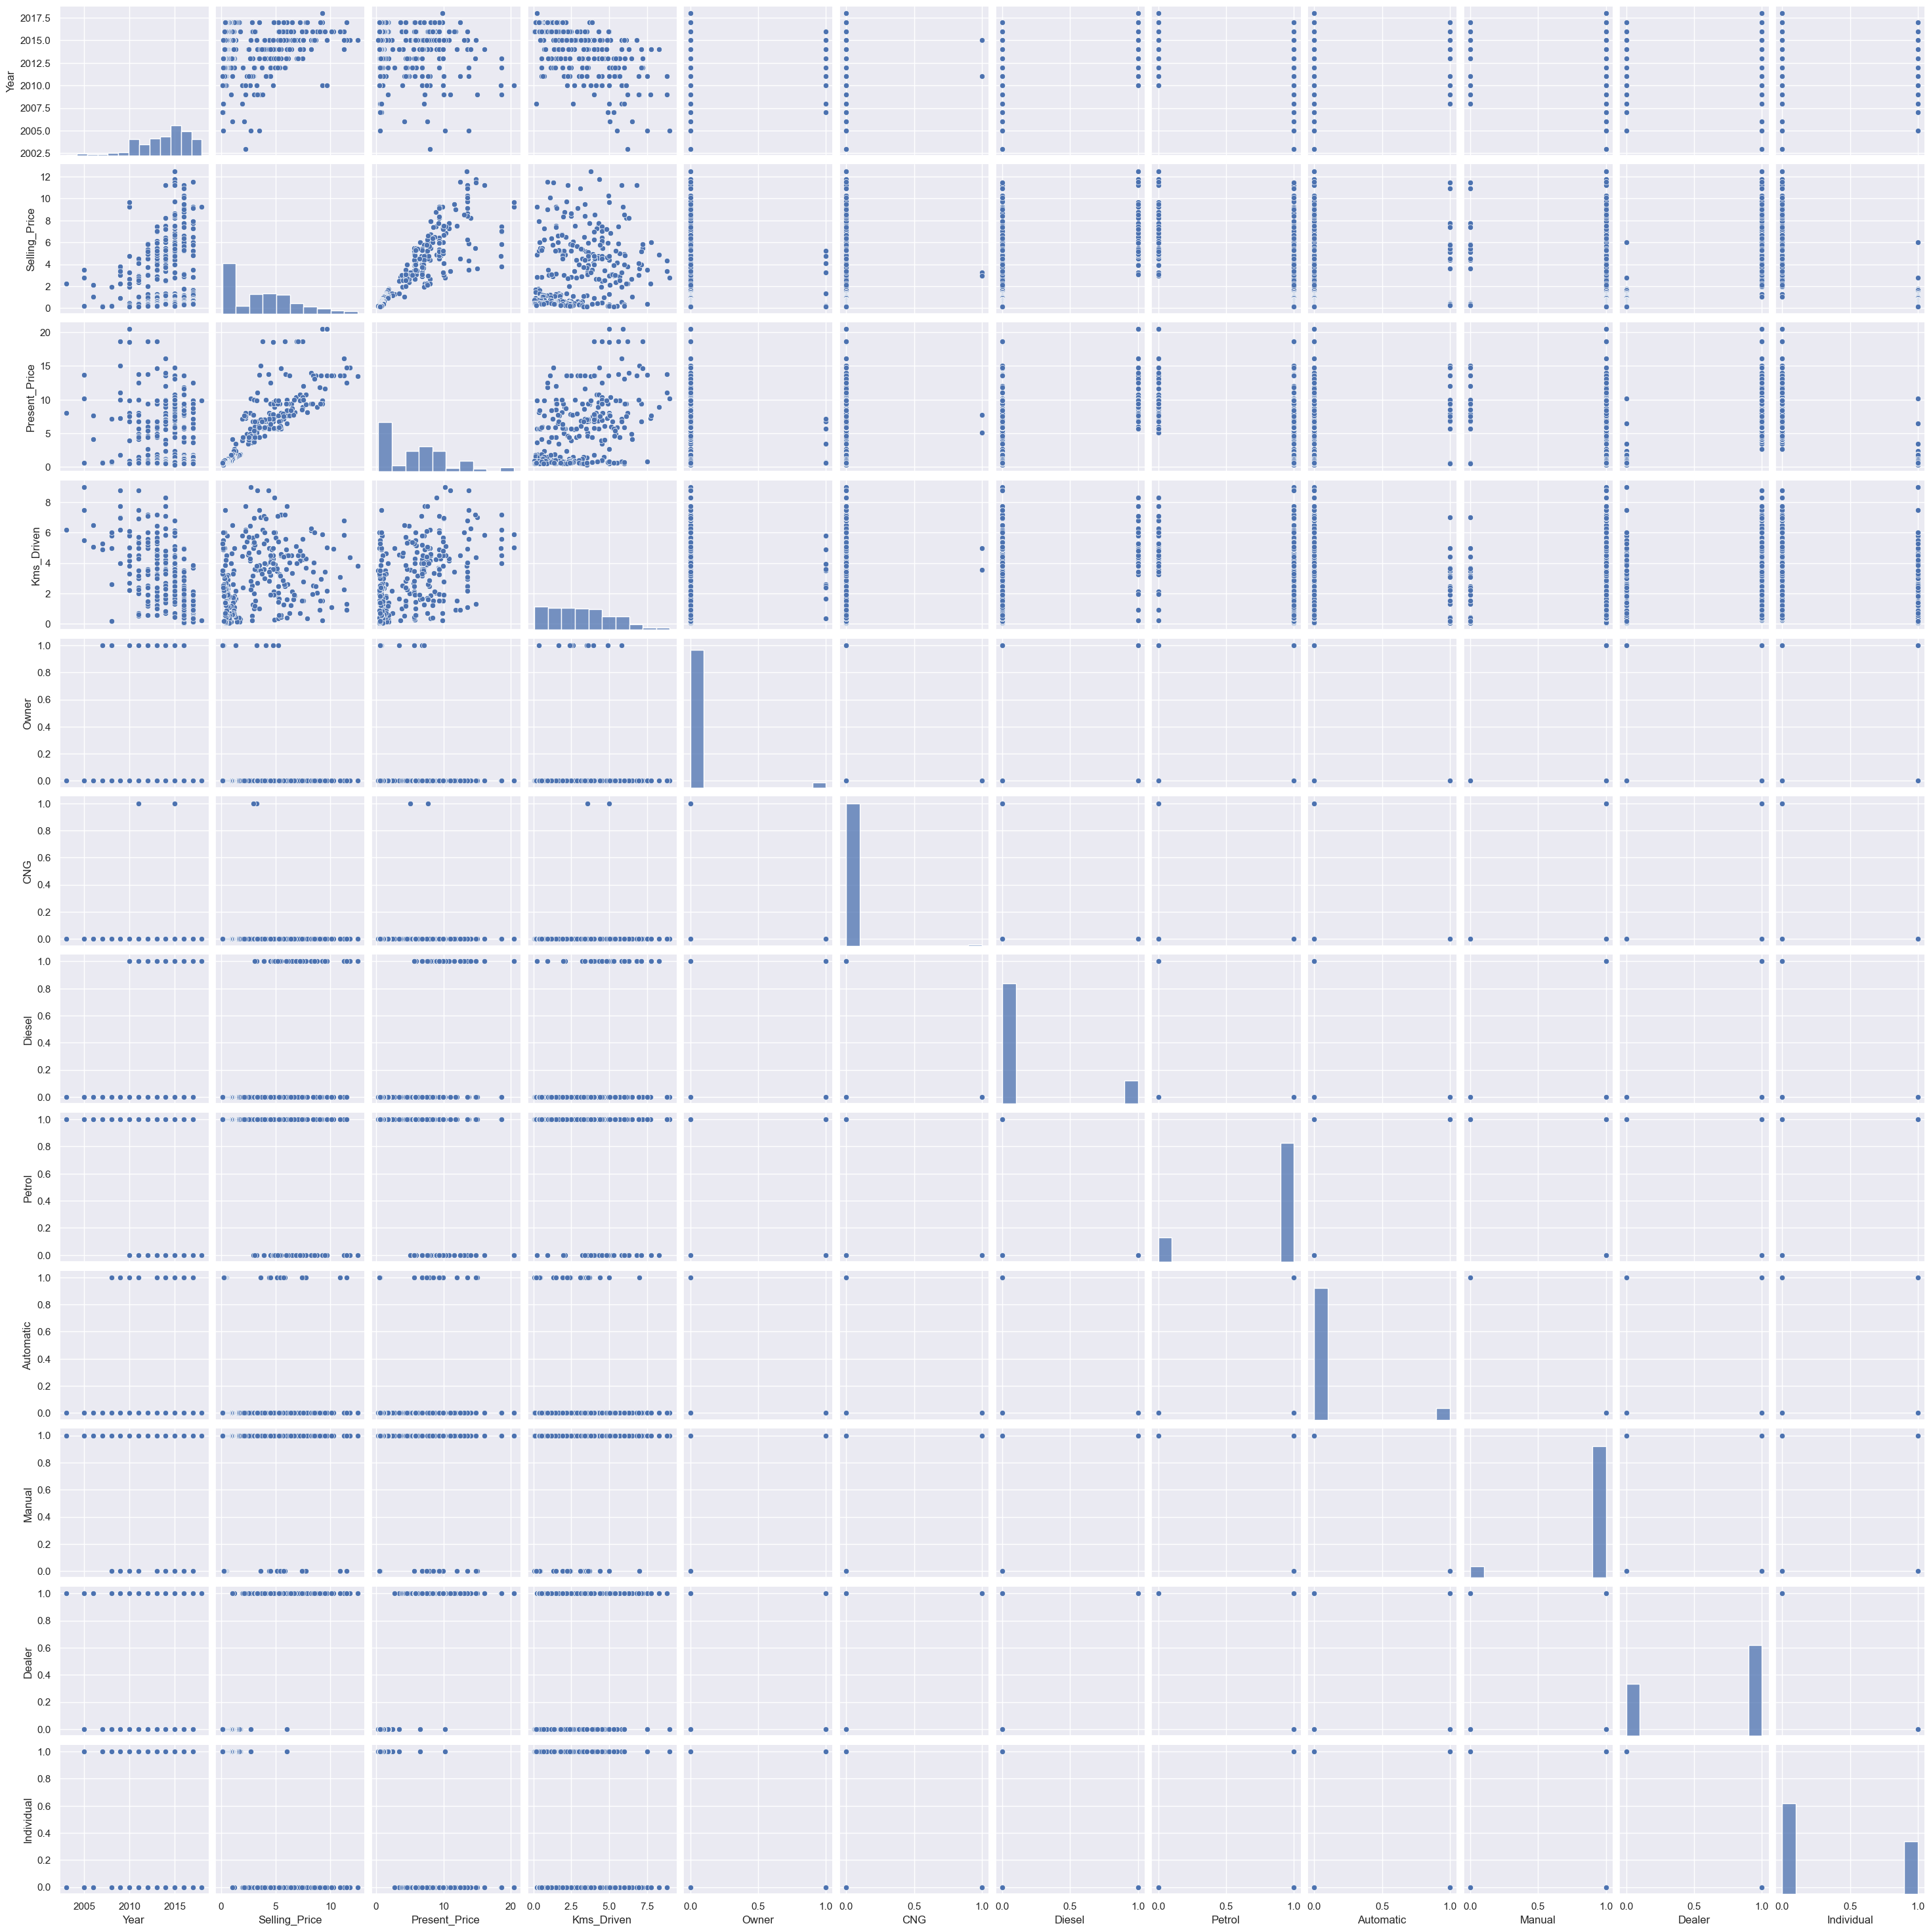

In [110]:
sns.pairplot(car_data_sp_pp_km_adjust);

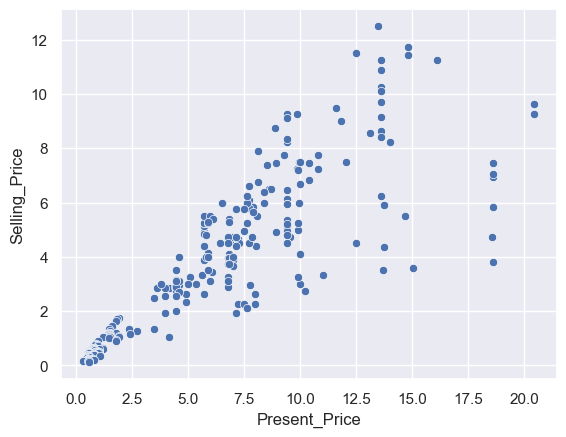

In [111]:
sns.scatterplot(data = car_data_sp_pp_km_adjust, x = 'Present_Price', y = 'Selling_Price');

The higher the current car price, the higher the used car's resale value.

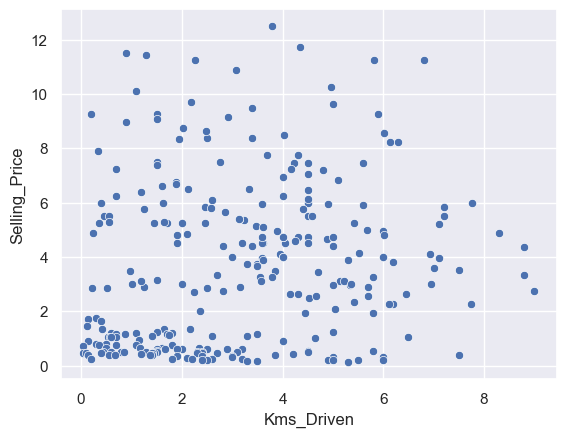

In [113]:
sns.scatterplot(data = car_data_sp_pp_km_adjust, x = 'Kms_Driven', y = 'Selling_Price');

The number of kilometres driven increases the selling price of used cars.Lesser number of kilometers driven increases the selling price of the used cars.

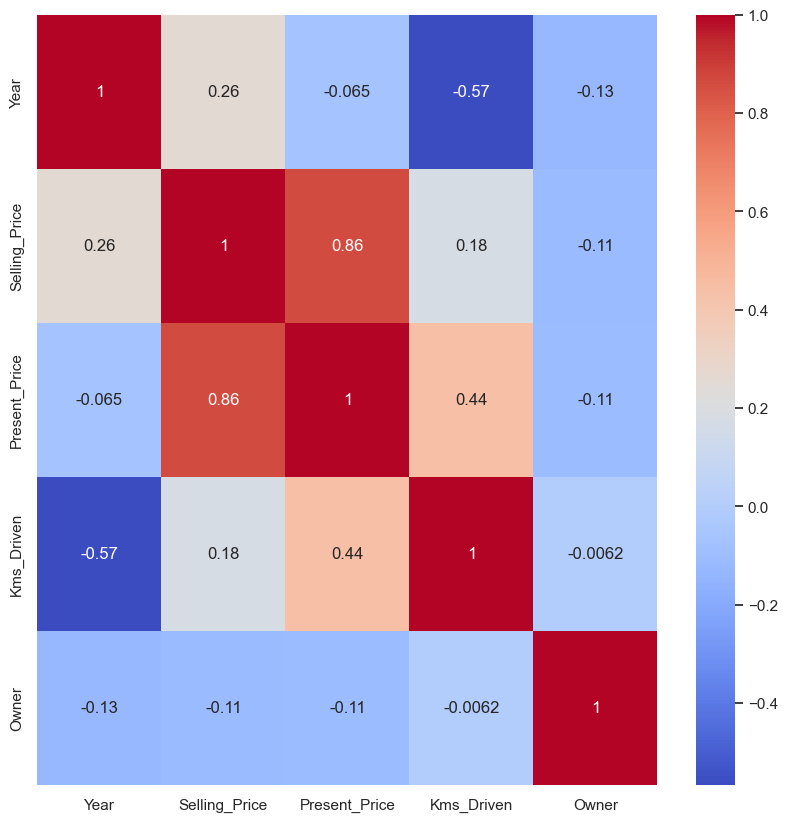

In [115]:
numeric_data = car_data_sp_pp_km_adjust.select_dtypes(include=['number'])
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm");

- `Selling_Price` & `Present_Price` (0.86, strong positive correlation)
- `Selling_Price` & `Dealer` (0.76, strong positive correlation)
- `Selling_Price` & `Individual` (-0.76, strong negative correlation)
- `Selling_Price` & `Diesel` (0.45, moderate positive correlation)
- `Selling_Price` & `Petrol` (-0.44, moderate negative correlation)

## Regression Modeling

Based on the results of the exploratory analysis, the present price of the same cars but new ones, number of kilometres driven, fuel type, seller type, and type of transmission significantly impact the selling price of used vehicles. Thus, if we examine the present price, the number of kilometres driven, fuel, seller, and transmission types (Xs), we can predict the used car selling price (Y).

Linear regression generally has two types: simple and multiple linear regression. As there is more than one independent variable, we will use a multiple linear regression model. Based on the insights identified above, to predict `Selling_Price` (dependent variable), we will be using the following independent variables:

- `Present_Price` (there is a strong positive correlation (0.86) between `Selling_Price` and `Present_Price`)
- `Kms_Driven` (a lesser number of kilometres driven would increase the selling price of the used cars)
- `Diesel` (used cars with diesel as fuel type have higher selling prices as compared to those which have petrol and CNG as fuel type; there is a moderate positive correlation (0.45) between `Selling_Price` and `Diesel`)
- `Dealer` (there is a strong positive correlation (0.76) between `Selling_Price` and `Dealer`)
- `Manual` (the selling price of the used cars with manual transmissions is lower than the used cars with automatic transmissions)

As `Year` is correlated (-0.57) with `Kms_Driven` and, as a result, it can cause a collinearity problem, we will not include this independent variable in our model.

In general, independent variables need some variability to be good predictors in a model. Thus, because the first owner owns most cars, `Owner` will also not be included in our model.

`Petrol`, `Individual`, and `Automatic` are redundant variables and do not carry any new information; thus, our model will not include them.

In [118]:
car_data_sp_pp_km_adjust[['Present_Price', 'Kms_Driven', 'Diesel', 'Dealer', 'Manual']].head()

,Present_Price,Kms_Driven,Diesel,Dealer,Manual
0,5.59,2.700,False,True,True
1,9.54,4.300,True,True,True
2,9.85,0.690,False,True,True
3,4.15,0.520,False,True,True
4,6.87,4.245,True,True,True


In [119]:
car_data_sp_pp_km_adjust['Diesel'] = car_data_sp_pp_km_adjust['Diesel'].astype(int)
car_data_sp_pp_km_adjust['Dealer'] = car_data_sp_pp_km_adjust['Dealer'].astype(int)
car_data_sp_pp_km_adjust['Manual'] = car_data_sp_pp_km_adjust['Manual'].astype(int)
car_data_sp_pp_km_adjust[['Present_Price', 'Kms_Driven', 'Diesel', 'Dealer', 'Manual']].head()

,Present_Price,Kms_Driven,Diesel,Dealer,Manual
0,5.59,2.700,0,1,1
1,9.54,4.300,1,1,1
2,9.85,0.690,0,1,1
3,4.15,0.520,0,1,1
4,6.87,4.245,1,1,1


In [120]:
Y = car_data_sp_pp_km_adjust['Selling_Price']
X = car_data_sp_pp_km_adjust[['Present_Price', 'Kms_Driven', 'Diesel', 'Dealer', 'Manual']]

# Add a constant to the model
X = sm.add_constant(X)
# Adding a constant to the model means adding an intercept term (a column of ones) to the dataset X
# so that the regression model can estimate the intercept of the linear relationship.
# In statistical models, the intercept represents the value of the dependent variable (Y)
# when all the independent variables (X) are equal to zero.

# Fit the OLS model
results_1 = sm.OLS(Y, X).fit()

# Display the summary
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     303.2
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          4.53e-108
Time:                        09:39:56   Log-Likelihood:                -431.51
No. Observations:                 274   AIC:                             875.0
Df Residuals:                     268   BIC:                             896.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4753      0.279      5.284

The regression summary shows the results of an Ordinary Least Squares (OLS) model predicting `Selling_Price` based on independent variables: `Present_Price`, `Kms_Driven`, `Diesel`, `Dealer`, and `Manual`. The **adjusted R-squared** value of **0.847** indicates that **84.7%** of the variation in `Selling_Price` is explained by the model, suggesting a good fit. Key coefficients include `Present_Price` (0.4589), showing a strong positive relationship with `Selling_Price`, and `Diesel` (1.5902), indicating higher selling prices for diesel vehicles. `Kms_Driven` (-0.4320) has a negative impact, meaning cars with higher mileage tend to have lower prices. The **p-values** for most variables (except `Manual`, with p=0.160) are below 0.05, confirming their statistical significance. The intercept (const) of 1.4753 represents the baseline Selling_Price when all predictors are zero. Overall, the model appears robust but could be improved by addressing the insignificance of the `Manual` variable and further diagnosing any potential multicollinearity or outliers.

In [122]:
# Option 1:
Y = car_data_sp_pp_km_adjust['Selling_Price']
X = car_data_sp_pp_km_adjust[['Present_Price', 'Kms_Driven', 'Diesel', 'Dealer']]
X = sm.add_constant(X)
results_1 = sm.OLS(Y, X).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     377.1
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          5.86e-109
Time:                        09:39:56   Log-Likelihood:                -432.52
No. Observations:                 274   AIC:                             875.0
Df Residuals:                     269   BIC:                             893.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1393      0.145      7.850      0.000       0.854       1.425
Present_Price     0.4618      0.025     18.833      0.000       0.413       0.510
Kms_Driven       -0.4384      0.040    -11.052      0.000      -0.517      -0.360
Diesel            1.5519      0.214      7.243      0.000       1.130       1.974
Dealer            1.5309      0.235      6.527      0.000       1.069       1.993
==============================================================================
Omnibus:                       17.398   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.920
Skew:                           0.045   Prob(JB):                     5.32e-12
Kurtosis:                       5.131   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression summary displays the results of an Ordinary Least Squares (OLS) model predicting `Selling_Price` based on `Present_Price`, `Kms_Driven`, `Diesel`, and `Dealer`. The **R-squared** value of **0.849** and **adjusted R-squared** of **0.846** indicate that the model explains about **85%** of the variance in `Selling_Price`. Key findings include a strong positive relationship between `Present_Price` (coefficient 0.4618) and `Selling_Price`, as well as a significant positive impact of the `Diesel` indicator (1.5519), suggesting diesel vehicles are valued higher. Conversely, `Kms_Driven` (-0.4384) shows a negative effect, indicating higher mileage decreases selling price. The `Dealer` variable (1.5309) has a positive relationship, meaning cars sold by dealers tend to have higher prices. All predictors have **p-values < 0.05**, confirming statistical significance. The intercept (`const`) of 1.1393 represents the baseline selling price when all predictors are zero. Overall, the model appears robust, with diagnostic tests (e.g., Durbin-Watson at 1.885) suggesting no significant autocorrelation issues. However, the Omnibus and Jarque-Bera tests (p < 0.05) indicate potential non-normality in residuals.

In [124]:
# Option 2:
results_2 = ols('Selling_Price ~ Present_Price + Kms_Driven + Diesel + Dealer',
                data = car_data_sp_pp_km_adjust).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     377.1
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          5.86e-109
Time:                        09:39:56   Log-Likelihood:                -432.52
No. Observations:                 274   AIC:                             875.0
Df Residuals:                     269   BIC:                             893.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1393      0.145      7.850

This regression summary presents the results of an OLS model predicting `Selling_Price` using `Present_Price`, `Kms_Driven`, `Diesel`, and `Dealer` as predictors. The model has an **R-squared** of **0.849**, indicating that approximately **85%** of the variance in `Selling_Price` is explained by the predictors, with an **adjusted R-squared** of **0.846**, suggesting a strong model fit. Key coefficients include `Present_Price` (0.4618), showing a strong positive relationship with `Selling_Price`, and `Diesel` (1.5519), indicating diesel cars generally have higher selling prices. `Kms_Driven` has a negative impact (-0.4384), showing that higher mileage decreases the selling price. Similarly, the `Dealer` variable (1.5309) indicates cars sold by dealers tend to fetch higher prices. All predictors have **p-values < 0.05**, indicating statistical significance. The intercept (`Intercept`) of 1.1393 represents the baseline selling price when all predictors are zero. Diagnostics such as the Durbin-Watson statistic (1.885) suggest no severe autocorrelation issues, though the Jarque-Bera and Omnibus tests highlight potential residual non-normality. Overall, the model appears robust and suitable for explaining variations in selling prices.

## Conclusion

The OLS regression model provides a robust explanation for variations in `Selling_Price`, with an **R-squared** value of **0.849**, indicating that approximately **85%** of the variance is captured by the predictors. Key insights reveal that `Present_Price` has the most substantial positive influence on `Selling_Price`, while `Diesel` cars and those sold by dealers are also associated with higher prices. Conversely, higher mileage (`Kms_Driven`) negatively impacts the selling price. All predictors in the model are statistically significant, reinforcing their relevance in explaining price variations. Despite these strong results, diagnostic tests suggest potential residual non-normality, highlighting areas for improvement in model fit.

To enhance the model's performance, incorporating additional data features, such as a `Condition` variable, could refine its explanatory power. Condition-related attributes like *Excellent*, *Good*, *Fair*, and *Poor* could capture nuanced differences in vehicle quality that are not directly correlated with mileage, providing a more comprehensive understanding of the factors influencing selling prices. Additionally, exploring alternative modelling techniques, such as non-linear algorithms or machine learning models, may better capture complex data relationships and improve predictions. Careful feature engineering and model selection will be essential to build on these findings in future iterations.